step 1: import all the packages

In [18]:
from skimage.feature import canny
from skimage import filters
from skimage.morphology import disk, binary_dilation, binary_erosion
from skimage.morphology import opening, closing
from skimage.filters import sobel, rank
from skimage.feature import hog
from skimage import data, exposure
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.color import rgb2gray

step 2: import the sample images

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [6]:
ped1 = plt.imread('/content/drive/MyDrive/PNGImages/FudanPed00001.png')
ped2 = plt.imread('/content/drive/MyDrive/PNGImages/FudanPed00005.png')

(-0.5, 334.5, 343.5, -0.5)

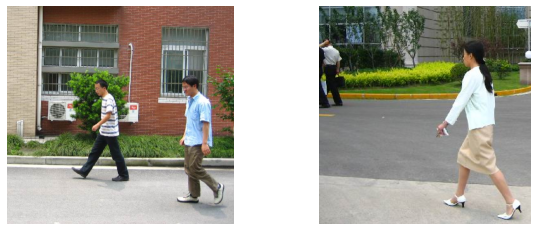

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))

axes[0].imshow(ped1)
axes[1].imshow(ped2)

axes[0].axis('off')
axes[1].axis('off')

step 3: apply gaussian filter to the image to smooth the image

the sigma is set to 6

In [14]:
ped1_g = filters.gaussian(ped1, sigma=6, multichannel=True)
ped2_g = filters.gaussian(ped2, sigma=6, multichannel=True)

show the smoothed images

(-0.5, 334.5, 343.5, -0.5)

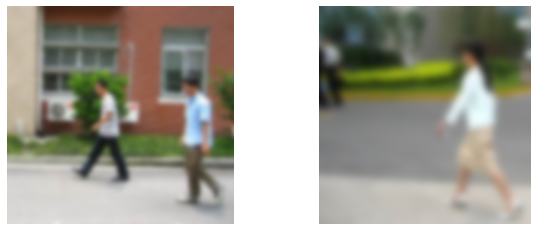

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))

axes[0].imshow(ped1_g)
axes[1].imshow(ped2_g)

axes[0].axis('off')
axes[1].axis('off')

step 4: resize the image to be size 256 * 256 for future training.

In [16]:
ped1_r = resize(ped1_g, (256, 256))
ped2_r = resize(ped2_g, (256, 256))

step 5: turn the 3 channel rgb image to a single channel greg scale image. 

since we are detecting humans, we dont want the colors and magnitudes to disturb the detection.

In [19]:
ped1_gs = rgb2gray(ped1_r)
ped2_gs = rgb2gray(ped2_r)

(-0.5, 255.5, 255.5, -0.5)

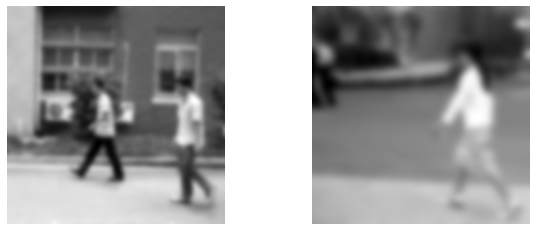

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))

axes[0].imshow(ped1_gs, cmap='gray')
axes[1].imshow(ped2_gs, cmap='gray')

axes[0].axis('off')
axes[1].axis('off')

step 6: apply sobel filter to the image.

we need to get the edges of the major objects in the image, for future detections for pedstrains. 

In [21]:
ped1_sob = rank.mean(sobel(ped1_gs), disk(2))
ped2_sob = rank.mean(sobel(ped2_gs), disk(2))

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


show the images after applying sobel filter.

you can now see the rough shape of a person.

(-0.5, 255.5, 255.5, -0.5)

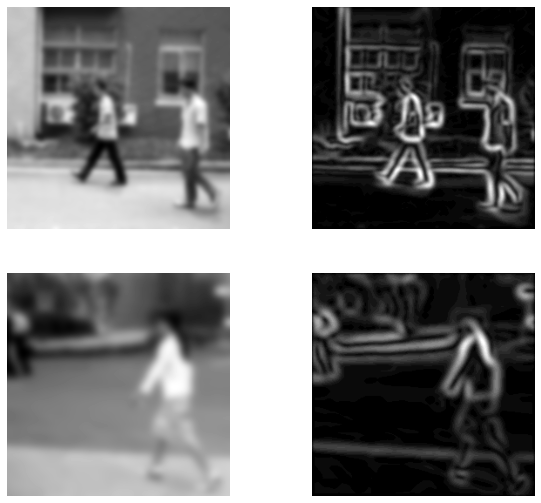

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,9))

axes[0,0].imshow(ped1_gs, cmap='gray')
axes[0,1].imshow(ped1_sob, cmap='gray')
axes[1,0].imshow(ped2_gs, cmap='gray')
axes[1,1].imshow(ped2_sob, cmap='gray')

axes[0,0].axis('off')
axes[0,1].axis('off')
axes[1,0].axis('off')
axes[1,1].axis('off')

step 7: apply hog filter on the image to get the gradient information of the image. 

In [23]:
fd1, hog_image1 = hog(ped1_sob, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)
fd2, hog_image2 = hog(ped2_sob, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

# Rescale histogram for better display
hog_image1_rescaled = exposure.rescale_intensity(hog_image1, in_range=(0, 0.8))
hog_image2_rescaled = exposure.rescale_intensity(hog_image2, in_range=(0, 0.8))

show the images.

now we can all see the gradient information on the image. 

we will be able to use all the gradient information to perform machine learning trainings. and the trained models will be able to use to detect pedetrains using the gradient informations of the images/videos.

Text(0.5, 1.0, 'Histogram of Oriented Gradients')

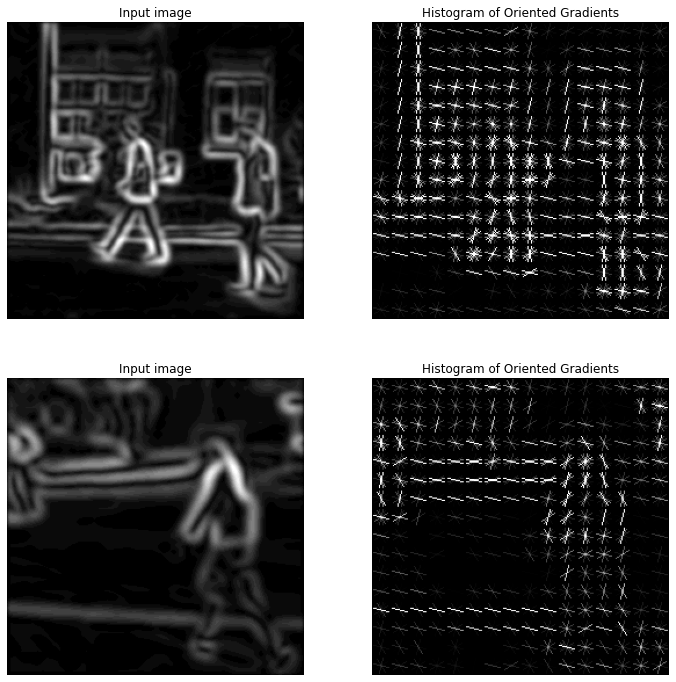

In [24]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

axes[0,0].axis('off')
axes[0,0].imshow(ped1_sob, cmap='gray')
axes[0,0].set_title('Input image')
axes[0,1].axis('off')
axes[0,1].imshow(hog_image1_rescaled, cmap=plt.cm.gray)
axes[0,1].set_title('Histogram of Oriented Gradients')

axes[1,0].axis('off')
axes[1,0].imshow(ped2_sob, cmap='gray')
axes[1,0].set_title('Input image')
axes[1,1].axis('off')
axes[1,1].imshow(hog_image2_rescaled, cmap=plt.cm.gray)
axes[1,1].set_title('Histogram of Oriented Gradients')
